In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import trange
import random

In [9]:
data = pd.read_csv("/content/sample_data/201901.csv",encoding='cp949')

In [19]:
data.describe()

,날짜,시간,계약전력,유효전력량,지상무효전력량,진상무효전력량
count,8.936500e+04,89365.000000,89365.000000,89364.000000,89364.000000,89364.000000
mean,2.019010e+07,1198.926537,745.194259,33.888642,6.169496,1.069799
std,1.119985e+00,692.975237,2043.422956,116.104103,30.135489,4.098691
min,2.019010e+07,15.000000,3.000000,0.000000,0.000000,0.000000
25%,2.019010e+07,600.000000,7.000000,0.170000,0.000000,0.000000
50%,2.019010e+07,1200.000000,60.000000,1.290000,0.030000,0.020000
75%,2.019010e+07,1800.000000,425.000000,13.660000,0.580000,0.220000
max,2.019010e+07,2400.000000,20000.000000,1530.000000,300.960000,47.430000


In [25]:
data.head()

,날짜,시간,시/도,읍_면_동,고객번호,계약종별,계약전력,공급방식,고저압구분,유효전력량,지상무효전력량,진상무효전력량
0,20190101,1000,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.58,0.18,0.0
1,20190101,1015,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
2,20190101,1030,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.54,0.14,0.0
3,20190101,815,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.54,0.18,0.0
4,20190101,830,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.54,0.14,0.0


<Axes: >

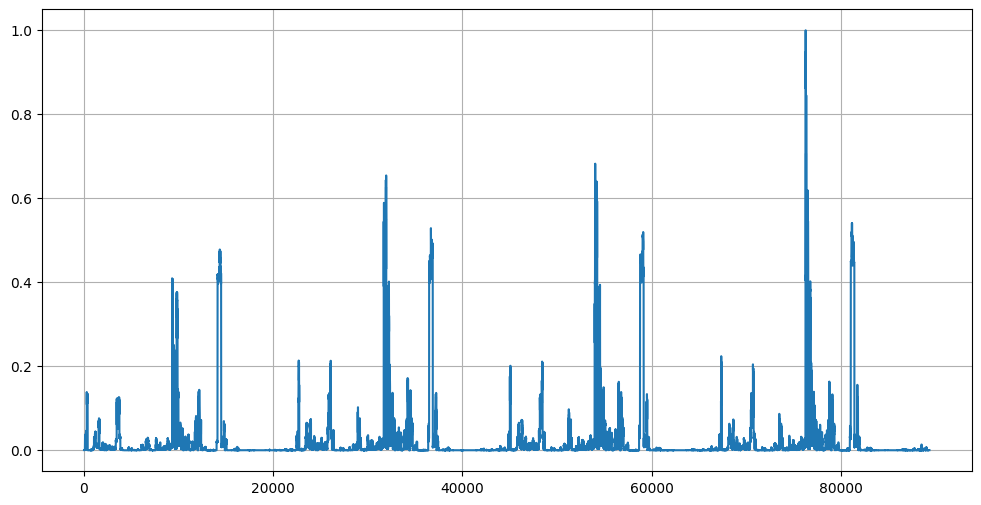

In [36]:
data["유효전력량"].plot(figsize = (12,6), grid = True)

<Axes: >

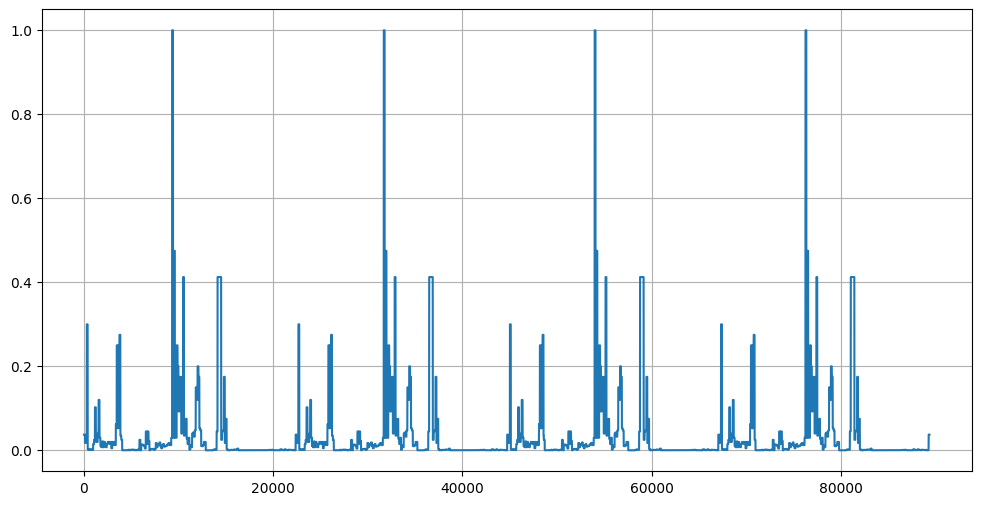

In [37]:
data["지상무효전력량"].plot(figsize = (12,6), grid = True)

<Axes: >

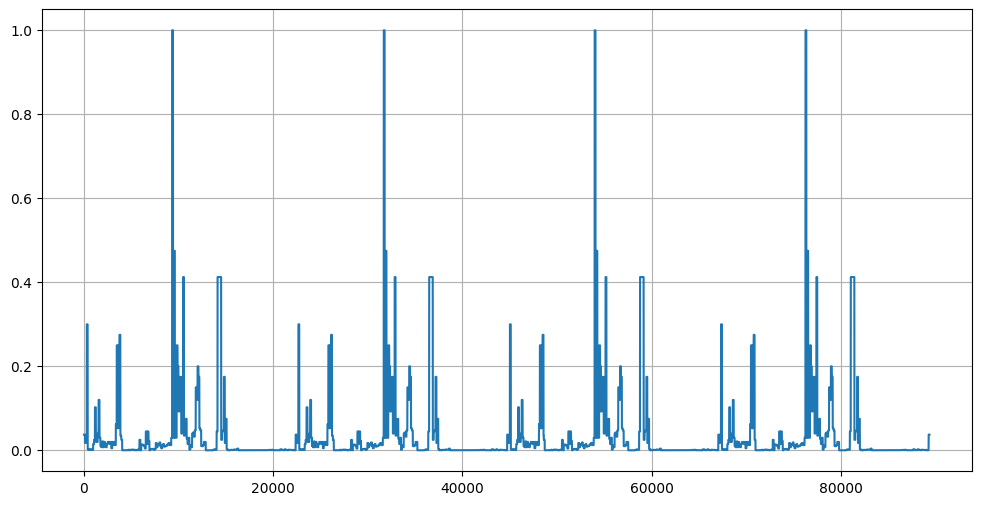

In [38]:
data["진상무효전력량"].plot(figsize = (12,6), grid = True)

<Axes: >

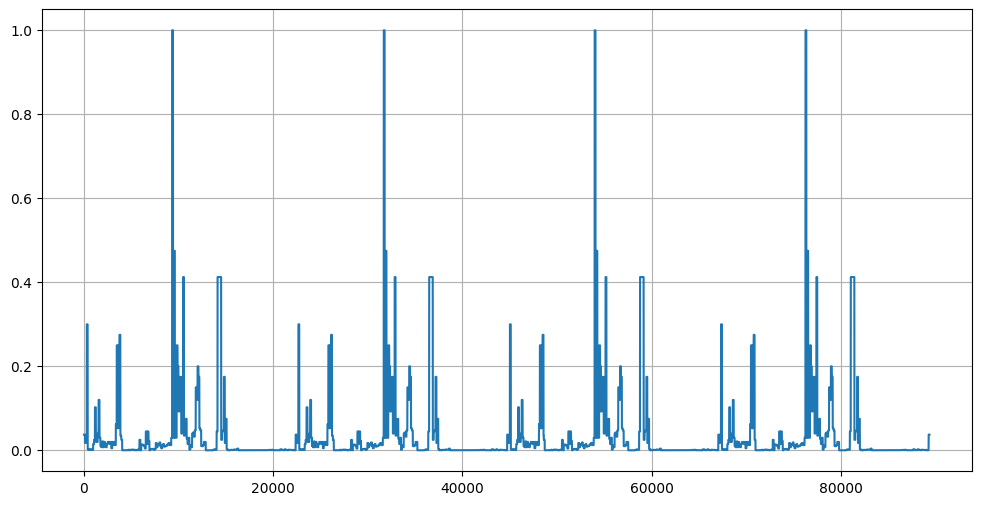

In [39]:
data["계약전력"].plot(figsize = (12,6), grid = True)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(len(data)), data["지상무효전력량"])

In [45]:
day_data = data[:20190102]
day_data

,날짜,시간,시/도,읍_면_동,고객번호,계약종별,계약전력,공급방식,고저압구분,유효전력량,지상무효전력량,진상무효전력량
0,20190101,1000,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000379,0.037356,0.037356
1,20190101,1015,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356
2,20190101,1030,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356
3,20190101,815,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356
4,20190101,830,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356
...,...,...,...,...,...,...,...,...,...,...,...,...
89360,20190105,1415,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356
89361,20190105,1430,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000379,0.037356,0.037356
89362,20190105,1445,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356
89363,20190105,1500,경기도,BB001동,b72c577b37,심야전력(을)II,0.037356,삼상4선(22.9kV-y),고압,0.000353,0.037356,0.037356


In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data["유효전력량"] = min_max_scaler.fit_transform(data["유효전력량"].to_numpy().reshape(-1,1))

In [35]:
data["유효전력량"]

0        0.000379
1        0.000353
2        0.000353
3        0.000353
4        0.000353
           ...   
89360    0.000353
89361    0.000379
89362    0.000353
89363    0.000353
89364         NaN
Name: 유효전력량, Length: 89365, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data["계약전력"] = min_max_scaler.fit_transform(data["계약전력"].to_numpy().reshape(-1,1))

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data["지상무효전력량"] = min_max_scaler.fit_transform(data["계약전력"].to_numpy().reshape(-1,1))

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data["진상무효전력량"] = min_max_scaler.fit_transform(data["계약전력"].to_numpy().reshape(-1,1))

In [ ]:
data : 시/도 = 경기도, 공급방식 = 삼상4선(22.9kV-y), 고저압구분 = 고압 으로 한 값으로 고정